In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
# https://www.kaggle.com/kimjihoo/coronavirusdataset?select=SeoulFloating.csv

# Data Overview

# 1.1) Case (Useful)

In [2]:
caseData = pd.read_csv('covid/case.csv')
caseData.head()

,case_id,province,city,group,infection_case,confirmed,latitude,longitude
0,1000001,Seoul,Yongsan-gu,True,Itaewon Clubs,139,37.538621,126.992652
1,1000002,Seoul,Gwanak-gu,True,Richway,119,37.48208,126.901384
2,1000003,Seoul,Guro-gu,True,Guro-gu Call Center,95,37.508163,126.884387
3,1000004,Seoul,Yangcheon-gu,True,Yangcheon Table Tennis Club,43,37.546061,126.874209
4,1000005,Seoul,Dobong-gu,True,Day Care Center,43,37.679422,127.044374


In [3]:
caseData.groupby('province').sum()

,case_id,group,confirmed
province,,,
Busan,11000055,7.0,156
Chungcheongbuk-do,28000028,4.0,60
Chungcheongnam-do,32800036,5.0,158
Daegu,12000055,7.0,6680
Daejeon,15000055,7.0,131
Gangwon-do,24000036,5.0,62
Gwangju,6500015,2.0,43
Gyeonggi-do,44000253,19.0,1000
Gyeongsangbuk-do,78000091,10.0,1324


# 1.2) Patient Info (Useful)

In [4]:
patientData = pd.read_csv('covid/patientinfo.csv')
patientData.head()

,patient_id,sex,age,country,province,city,infection_case,infected_by,contact_number,symptom_onset_date,confirmed_date,released_date,deceased_date,state
0,1000000001,male,50s,Korea,Seoul,Gangseo-gu,overseas inflow,NaN,75,2020-01-22,2020-01-23,2020-02-05,NaN,released
1,1000000002,male,30s,Korea,Seoul,Jungnang-gu,overseas inflow,NaN,31,NaN,2020-01-30,2020-03-02,NaN,released
2,1000000003,male,50s,Korea,Seoul,Jongno-gu,contact with patient,2002000001,17,NaN,2020-01-30,2020-02-19,NaN,released
3,1000000004,male,20s,Korea,Seoul,Mapo-gu,overseas inflow,NaN,9,2020-01-26,2020-01-30,2020-02-15,NaN,released
4,1000000005,female,20s,Korea,Seoul,Seongbuk-gu,contact with patient,1000000002,2,NaN,2020-01-31,2020-02-24,NaN,released


In [5]:
groupPatientData = patientData.groupby('confirmed_date').size()
groupPatientData

confirmed_date
2020-01-20     1
2020-01-23     1
2020-01-26     1
2020-01-27     1
2020-01-30     4
              ..
2020-06-26    40
2020-06-27    48
2020-06-28    38
2020-06-29    25
2020-06-30     7
Length: 148, dtype: int64

(array([-20.,   0.,  20.,  40.,  60.,  80., 100., 120., 140., 160.]),
 <a list of 10 Text xticklabel objects>)

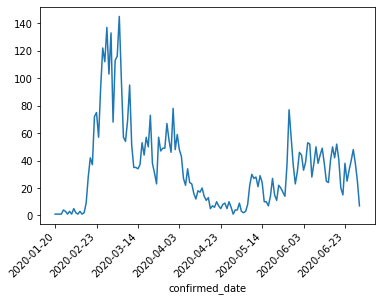

In [6]:
groupPatientData.plot()
plt.xticks(rotation=45, ha='right')

# 1.3) Policy (Not useful)

In [7]:
policyData = pd.read_csv('covid/policy.csv')
policyData.head()

,policy_id,country,type,gov_policy,detail,start_date,end_date
0,1,Korea,Alert,Infectious Disease Alert Level,Level 1 (Blue),2020-01-03,2020-01-19
1,2,Korea,Alert,Infectious Disease Alert Level,Level 2 (Yellow),2020-01-20,2020-01-27
2,3,Korea,Alert,Infectious Disease Alert Level,Level 3 (Orange),2020-01-28,2020-02-22
3,4,Korea,Alert,Infectious Disease Alert Level,Level 4 (Red),2020-02-23,NaN
4,5,Korea,Immigration,Special Immigration Procedure,from China,2020-02-04,NaN


# 1.4) Search Trend (50-50)

In [8]:
searchData = pd.read_csv('covid/searchtrend.csv')
searchData.head()

,date,cold,flu,pneumonia,coronavirus
0,2016-01-01,0.11663,0.05590,0.15726,0.00736
1,2016-01-02,0.13372,0.17135,0.20826,0.00890
2,2016-01-03,0.14917,0.22317,0.19326,0.00845
3,2016-01-04,0.17463,0.18626,0.29008,0.01145
4,2016-01-05,0.17226,0.15072,0.24562,0.01381


(array([-250.,    0.,  250.,  500.,  750., 1000., 1250., 1500., 1750.]),
 <a list of 9 Text xticklabel objects>)

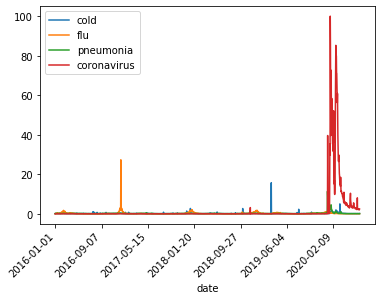

In [9]:
searchData.index = searchData['date']
searchData.plot()
plt.xticks(rotation=45, ha='right')

# 1.5) Seoul Floating (Not useful)

In [10]:
seoulFloatingData = pd.read_csv('covid/SeoulFloating.csv')
seoulFloatingData.head()

,date,hour,birth_year,sex,province,city,fp_num
0,2020-01-01,0,20,female,Seoul,Dobong-gu,19140
1,2020-01-01,0,20,male,Seoul,Dobong-gu,19950
2,2020-01-01,0,20,female,Seoul,Dongdaemun-gu,25450
3,2020-01-01,0,20,male,Seoul,Dongdaemun-gu,27050
4,2020-01-01,0,20,female,Seoul,Dongjag-gu,28880


In [11]:
groupedSeoulData = seoulFloatingData.groupby(['date','sex','birth_year'])['birth_year'].count()
groupedSeoulData

date        sex     birth_year
2020-01-01  female  20            600
                    30            600
                    40            600
                    50            600
                    60            600
                                 ... 
2020-05-31  male    30            600
                    40            600
                    50            600
                    60            600
                    70            600
Name: birth_year, Length: 1812, dtype: int64

# 1.6) Time (Useful)

In [12]:
timeData = pd.read_csv('covid/time.csv')
timeData.head()

,date,time,test,negative,confirmed,released,deceased
0,2020-01-20,16,1,0,1,0,0
1,2020-01-21,16,1,0,1,0,0
2,2020-01-22,16,4,3,1,0,0
3,2020-01-23,16,22,21,1,0,0
4,2020-01-24,16,27,25,2,0,0


(array([-20.,   0.,  20.,  40.,  60.,  80., 100., 120., 140., 160., 180.]),
 <a list of 11 Text xticklabel objects>)

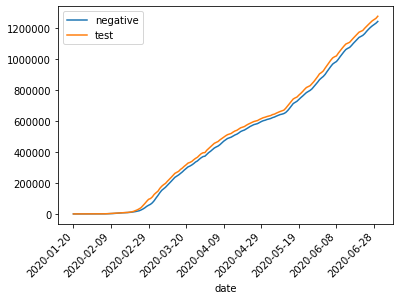

In [13]:
timeData.index = timeData['date']
timeData[{'test', 'negative'}].plot()
plt.xticks(rotation=45, ha='right')

(array([-20.,   0.,  20.,  40.,  60.,  80., 100., 120., 140., 160., 180.]),
 <a list of 11 Text xticklabel objects>)

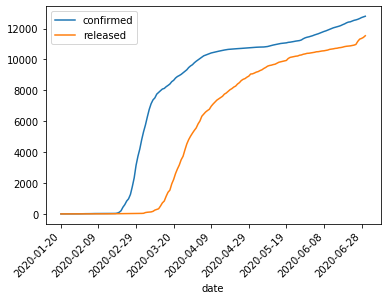

In [14]:
timeData[{'confirmed', 'released'}].plot()
plt.xticks(rotation=45, ha='right')

# 1.7) TimeAge (Useful)

In [15]:
timeAgeData = pd.read_csv('covid/timeage.csv')
timeAgeData.head()

,date,time,age,confirmed,deceased
0,2020-03-02,0,0s,32,0
1,2020-03-02,0,10s,169,0
2,2020-03-02,0,20s,1235,0
3,2020-03-02,0,30s,506,1
4,2020-03-02,0,40s,633,1


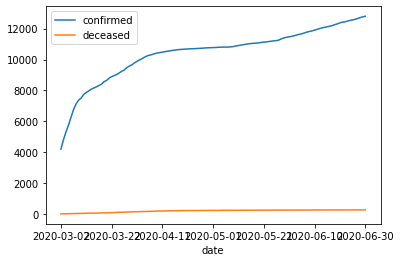

In [16]:
# timeAgeData.index = timeAgeData['date']
newData = timeAgeData[{'date', 'confirmed','deceased'}]
newData.groupby(['date']).sum().plot()

# 1.8) Time Gender (Useful)

In [17]:
timeGender = pd.read_csv('covid/timegender.csv')
timeGender.head()

,date,time,sex,confirmed,deceased
0,2020-03-02,0,male,1591,13
1,2020-03-02,0,female,2621,9
2,2020-03-03,0,male,1810,16
3,2020-03-03,0,female,3002,12
4,2020-03-04,0,male,1996,20


# 1.9) Time Province (Useful)

In [18]:
timeProvince = pd.read_csv('covid/timeprovince.csv')
timeProvince.head()

,date,time,province,confirmed,released,deceased
0,2020-01-20,16,Seoul,0,0,0
1,2020-01-20,16,Busan,0,0,0
2,2020-01-20,16,Daegu,0,0,0
3,2020-01-20,16,Incheon,1,0,0
4,2020-01-20,16,Gwangju,0,0,0


In [19]:
timeProvince.index = timeProvince['date']
timeProvince.head()

,date,time,province,confirmed,released,deceased
date,,,,,,
2020-01-20,2020-01-20,16,Seoul,0,0,0
2020-01-20,2020-01-20,16,Busan,0,0,0
2020-01-20,2020-01-20,16,Daegu,0,0,0
2020-01-20,2020-01-20,16,Incheon,1,0,0
2020-01-20,2020-01-20,16,Gwangju,0,0,0


# 1.10) Weather (50-50)

In [20]:
weatherData = pd.read_csv('covid/weather.csv')
weatherData.head()

,code,province,date,avg_temp,min_temp,max_temp,precipitation,max_wind_speed,most_wind_direction,avg_relative_humidity
0,10000,Seoul,2016-01-01,1.2,-3.3,4.0,0.0,3.5,90.0,73.0
1,11000,Busan,2016-01-01,5.3,1.1,10.9,0.0,7.4,340.0,52.1
2,12000,Daegu,2016-01-01,1.7,-4.0,8.0,0.0,3.7,270.0,70.5
3,13000,Gwangju,2016-01-01,3.2,-1.5,8.1,0.0,2.7,230.0,73.1
4,14000,Incheon,2016-01-01,3.1,-0.4,5.7,0.0,5.3,180.0,83.9
